In [1]:
#!pip install imblearn

In [81]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler , LabelEncoder
import matplotlib.pyplot as plt 
import os 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report , mean_squared_error
import imblearn
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid


In [3]:
myData = pd.read_excel(r'D:\Mechatronics Department\Machine Learning on Cloud\AWS Academy Machine Learning Foundations\Projects\default of credit card clients.xls')
myData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
(myData['AGE'] > 100).sum()

7

In [5]:
myData.rename(columns={'default payment next month':'Default_Payment'} , inplace=True)

In [6]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               30000 non-null  int64 
 1   LIMIT_BAL        30000 non-null  int64 
 2   SEX              30000 non-null  object
 3   EDUCATION        29669 non-null  object
 4   MARRIAGE         29677 non-null  object
 5   AGE              30000 non-null  int64 
 6   PAY_0            30000 non-null  int64 
 7   PAY_2            30000 non-null  int64 
 8   PAY_3            30000 non-null  int64 
 9   PAY_4            30000 non-null  int64 
 10  PAY_5            30000 non-null  int64 
 11  PAY_6            30000 non-null  int64 
 12  BILL_AMT1        30000 non-null  int64 
 13  BILL_AMT2        30000 non-null  int64 
 14  BILL_AMT3        30000 non-null  int64 
 15  BILL_AMT4        30000 non-null  int64 
 16  BILL_AMT5        30000 non-null  int64 
 17  BILL_AMT6        30000 non-null

In [7]:
myData.isnull().sum()

ID                   0
LIMIT_BAL            0
SEX                  0
EDUCATION          331
MARRIAGE           323
AGE                  0
PAY_0                0
PAY_2                0
PAY_3                0
PAY_4                0
PAY_5                0
PAY_6                0
BILL_AMT1            0
BILL_AMT2            0
BILL_AMT3            0
BILL_AMT4            0
BILL_AMT5            0
BILL_AMT6            0
PAY_AMT1             0
PAY_AMT2             0
PAY_AMT3             0
PAY_AMT4             0
PAY_AMT5             0
PAY_AMT6             0
Default_Payment      0
dtype: int64

Note that: 
1. There are some missing values in columns [EDUCATION, MARRIAGE] 
2. The type of this dataset is 'Quantative' except the columns [EDUCATION, MARRIAGE, SEX] are Categorical.

In [8]:
myData['EDUCATION'].isnull().sum()

331

In [9]:
for i in ['EDUCATION' , 'MARRIAGE']:
    percentage_per_col = ((myData[i].isnull().sum() / myData.shape[0])*100)
    print(f'Percentage of the Missing values relative to the columns data in col {i} is {percentage_per_col:0.3f} %')
print(f'Percentage of the Missing values relative to the whole dataset: {((myData.EDUCATION.isnull().sum() + myData.MARRIAGE.isnull().sum())/myData.shape[0])*100:0.3f} %')

Percentage of the Missing values relative to the columns data in col EDUCATION is 1.103 %
Percentage of the Missing values relative to the columns data in col MARRIAGE is 1.077 %
Percentage of the Missing values relative to the whole dataset: 2.180 %


As we saw the missing values seem a little bit many..

Note that: 
1. There are some missing values in columns [EDUCATION, MARRIAGE] 
2. The type of this dataset is 'Quantative' except the columns [EDUCATION, MARRIAGE, SEX] are Categorical.

Preprocessing the Data

In [10]:
myData2 = myData.copy()

In [11]:
for i in ['EDUCATION', 'MARRIAGE']:
    print(f'Unique value in {i} is {myData2[i].unique()}')

Unique value in EDUCATION is ['university' 'graduate school' 'others' 'high school' nan 0]
Unique value in MARRIAGE is ['married' 'single' nan 0]


Note that there are Zeros in both catergories which means that there is numerical values in the same columns. We can convert the Zeros values into 'NaN' values to be at the same category
So:
1. We need convert the Zeros values into 'NaN' values to be at the same category
2. We need to impute the missing values 'NaN' by 'most_frequent' or 'mean or inerpolate', we will try the two methods

In [12]:
myData2['EDUCATION'].unique()

array(['university', 'graduate school', 'others', 'high school', nan, 0],
      dtype=object)

In [13]:
for i in ['EDUCATION', 'MARRIAGE']:
    myData2[i].astype('category')
    print(myData2[i].unique())
    myData2[i]= myData2[i].replace(0, np.nan)    

['university' 'graduate school' 'others' 'high school' nan 0]
['married' 'single' nan 0]


Convert the Zeros values into 'NaN' values AND impute the missing values 'NaN' by 'most_frequent' method

In [14]:
for i in ['EDUCATION', 'MARRIAGE']:
    most_frequent = myData2[i].mode()
    myData2[i].fillna(most_frequent[0], inplace=True)
    

In [15]:
for i in ['EDUCATION', 'MARRIAGE']:
    print(f'Unique value in {i} is {myData2[i].unique()}')
    
    

Unique value in EDUCATION is ['university' 'graduate school' 'others' 'high school']
Unique value in MARRIAGE is ['married' 'single']


In [16]:
myData2.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [17]:
myData2[['EDUCATION', 'MARRIAGE','SEX']].describe()

,EDUCATION,MARRIAGE,SEX
count,30000,30000,30000
unique,4,2,2
top,university,single,female
freq,14375,16341,18112


 impute the missing values 'NaN' by ''mean or inerpolate' method 

In [18]:
for i in ['EDUCATION', 'MARRIAGE']:
    myData2[i] = myData2[i].astype('category')

In [19]:
myData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               30000 non-null  int64   
 1   LIMIT_BAL        30000 non-null  int64   
 2   SEX              30000 non-null  object  
 3   EDUCATION        30000 non-null  category
 4   MARRIAGE         30000 non-null  category
 5   AGE              30000 non-null  int64   
 6   PAY_0            30000 non-null  int64   
 7   PAY_2            30000 non-null  int64   
 8   PAY_3            30000 non-null  int64   
 9   PAY_4            30000 non-null  int64   
 10  PAY_5            30000 non-null  int64   
 11  PAY_6            30000 non-null  int64   
 12  BILL_AMT1        30000 non-null  int64   
 13  BILL_AMT2        30000 non-null  int64   
 14  BILL_AMT3        30000 non-null  int64   
 15  BILL_AMT4        30000 non-null  int64   
 16  BILL_AMT5        30000 non-null  int64  

In [20]:
for i in ['EDUCATION', 'MARRIAGE']:
    myData2[i] = (myData2[i].cat.codes.replace(-1, np.nan).interpolate().astype(int).astype('category').cat.rename_categories(myData2[i].cat.categories))

In [21]:
myData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               30000 non-null  int64   
 1   LIMIT_BAL        30000 non-null  int64   
 2   SEX              30000 non-null  object  
 3   EDUCATION        30000 non-null  category
 4   MARRIAGE         30000 non-null  category
 5   AGE              30000 non-null  int64   
 6   PAY_0            30000 non-null  int64   
 7   PAY_2            30000 non-null  int64   
 8   PAY_3            30000 non-null  int64   
 9   PAY_4            30000 non-null  int64   
 10  PAY_5            30000 non-null  int64   
 11  PAY_6            30000 non-null  int64   
 12  BILL_AMT1        30000 non-null  int64   
 13  BILL_AMT2        30000 non-null  int64   
 14  BILL_AMT3        30000 non-null  int64   
 15  BILL_AMT4        30000 non-null  int64   
 16  BILL_AMT5        30000 non-null  int64  

In [22]:
for i in ['EDUCATION', 'MARRIAGE']:
    print(f'Unique value in {i} is {myData2[i].unique()}')

Unique value in EDUCATION is ['university', 'graduate school', 'others', 'high school']
Categories (4, object): ['university', 'graduate school', 'others', 'high school']
Unique value in MARRIAGE is ['married', 'single']
Categories (2, object): ['married', 'single']


# Visualizations for the data after Prepared
## Numerical data visualizations to see data distribution and skewness

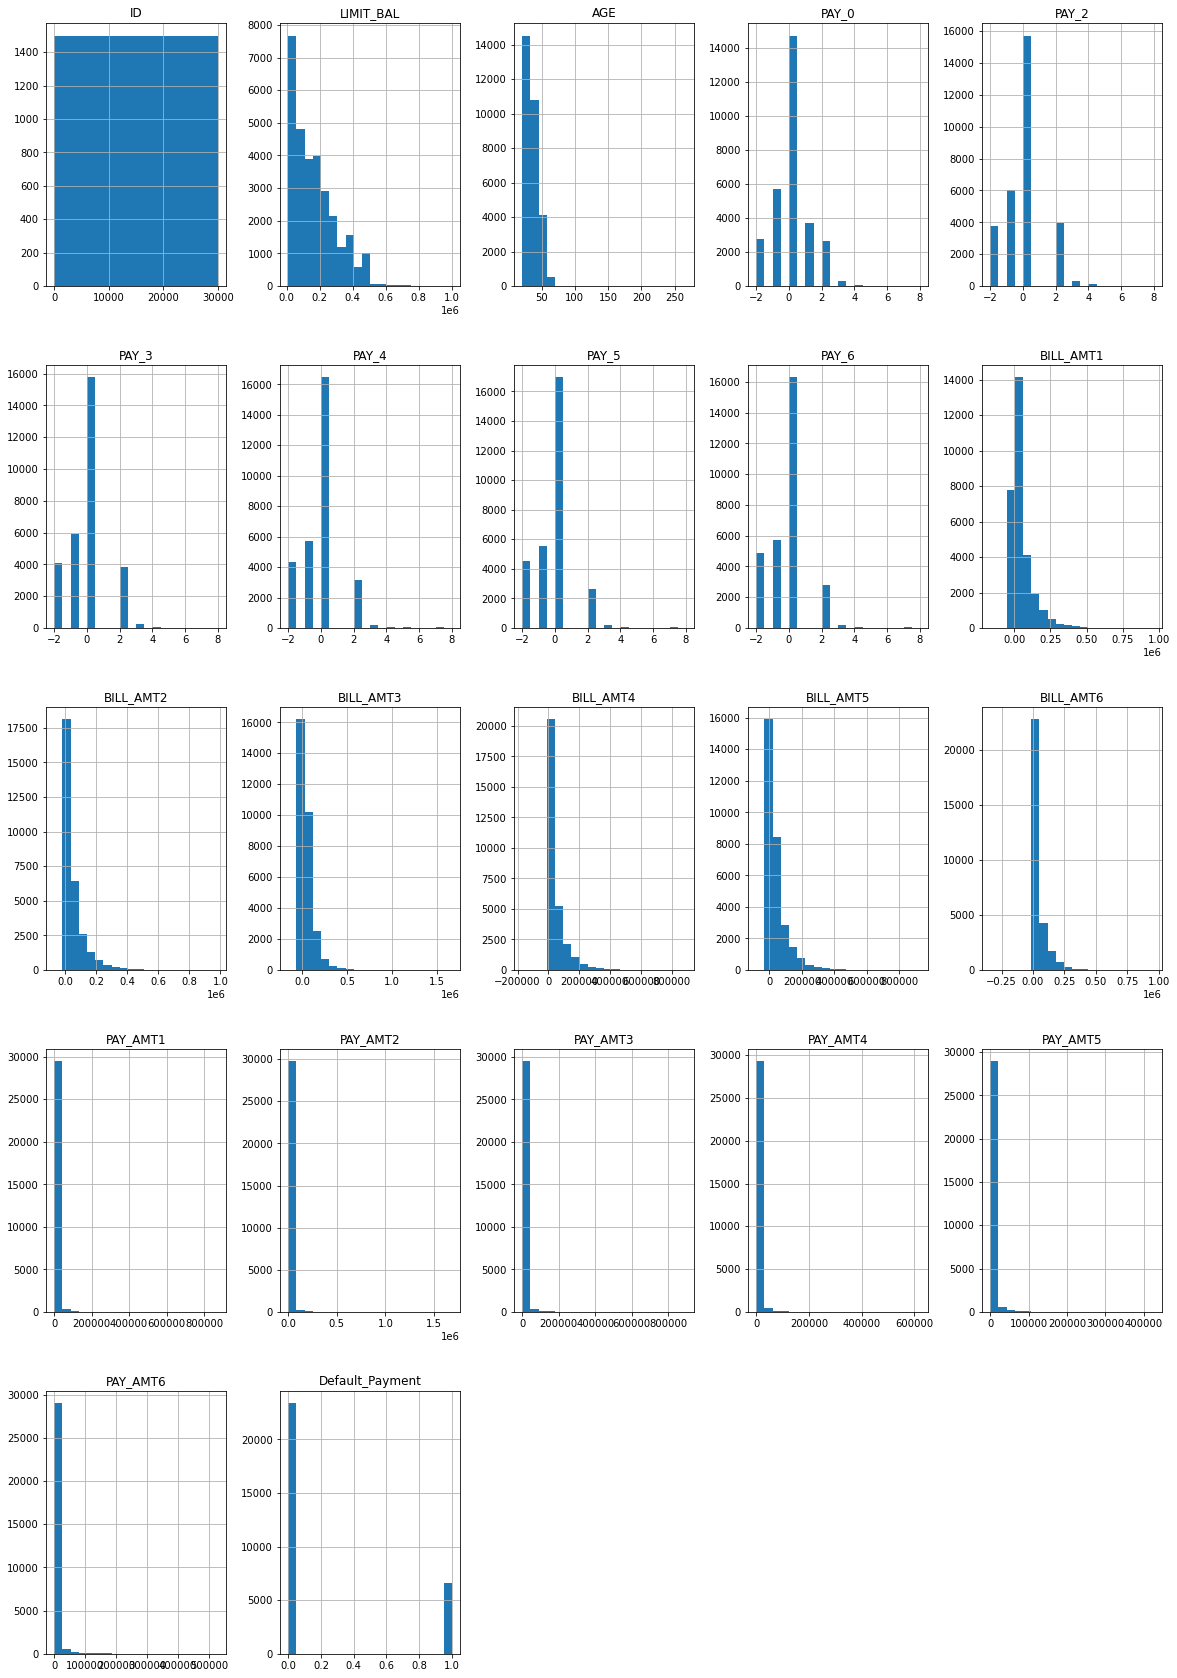

In [23]:
myData2.hist(bins = 20 ,figsize= (20,30))
plt.show()

## Catergorical data visualizations to see data distribution and skewness

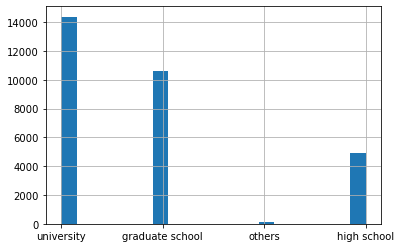

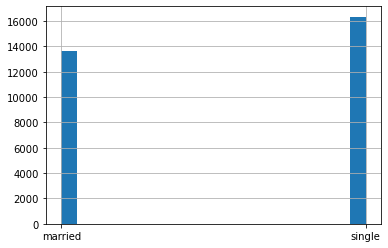

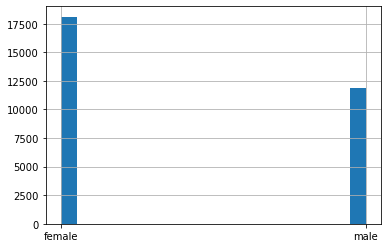

In [24]:
for i in ['EDUCATION', 'MARRIAGE', 'SEX']:
    myData2[i].hist(bins = 20, figsize=None)
    plt.show()
    #myData2[i].value_counts().plot.bar()
    #plt.xlabel(i)
    #plt.show()

In [25]:
myData_Corr = myData2.corr()
myData_Corr.style.background_gradient()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
ID,1.000000,0.026179,0.016535,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.141850,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
AGE,0.016535,0.141850,1.000000,-0.038423,-0.049001,-0.051713,-0.048341,-0.052178,-0.046605,0.056643,0.054896,0.053829,0.051449,0.050098,0.048433,0.025967,0.021011,0.028343,0.022578,0.021922,0.022317,0.013259
PAY_0,-0.030575,-0.271214,-0.038423,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.049001,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.051713,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.048341,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.022199,-0.249411,-0.052178,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149
PAY_6,-0.020270,-0.235195,-0.046605,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.186866
BILL_AMT1,0.019389,0.285430,0.056643,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644


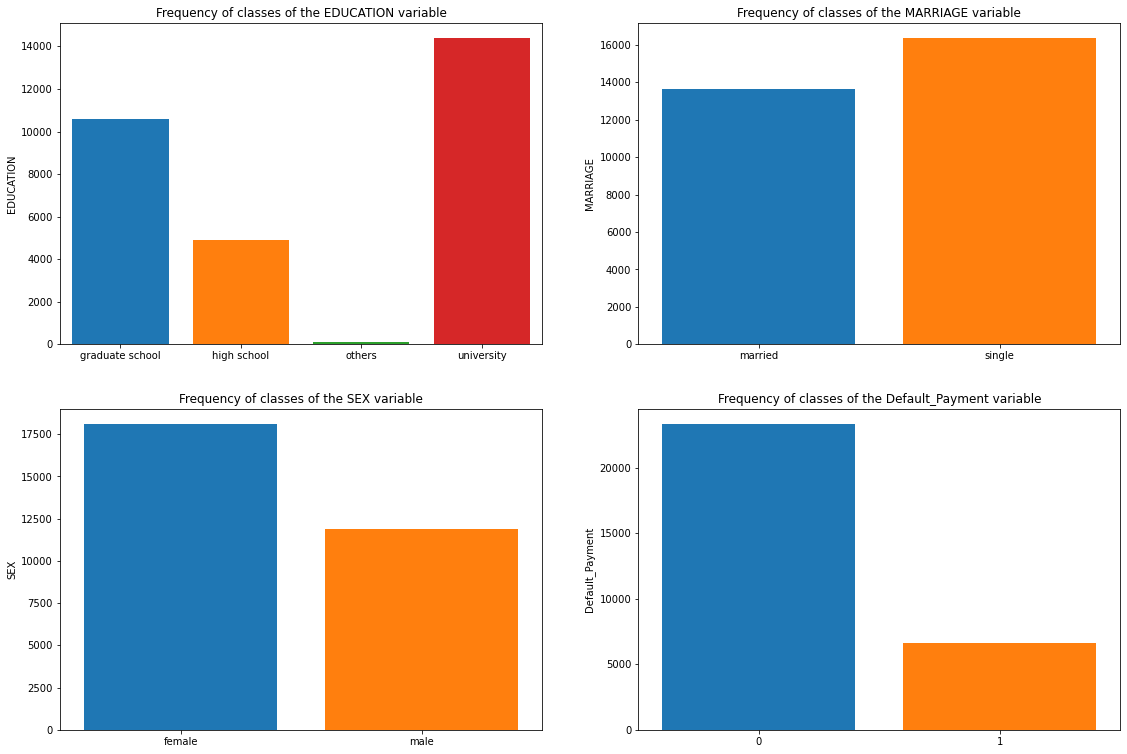

In [26]:
fig, axes = plt.subplots(2, 2, figsize = (19, 13))
axes = axes.flatten()
cols = ['EDUCATION','MARRIAGE', 'SEX', 'Default_Payment']
for j, i in enumerate (cols, start=0):
        sns.barplot(ax = axes[j], x = myData2[i].value_counts().index, y = myData2[i].value_counts(),
        data = myData2, saturation = 1).set(title = f"Frequency of classes of the {i} variable");

### Now, we need to see the outliers through BoxPlots

In [27]:
myData2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default_Payment'],
      dtype='object')

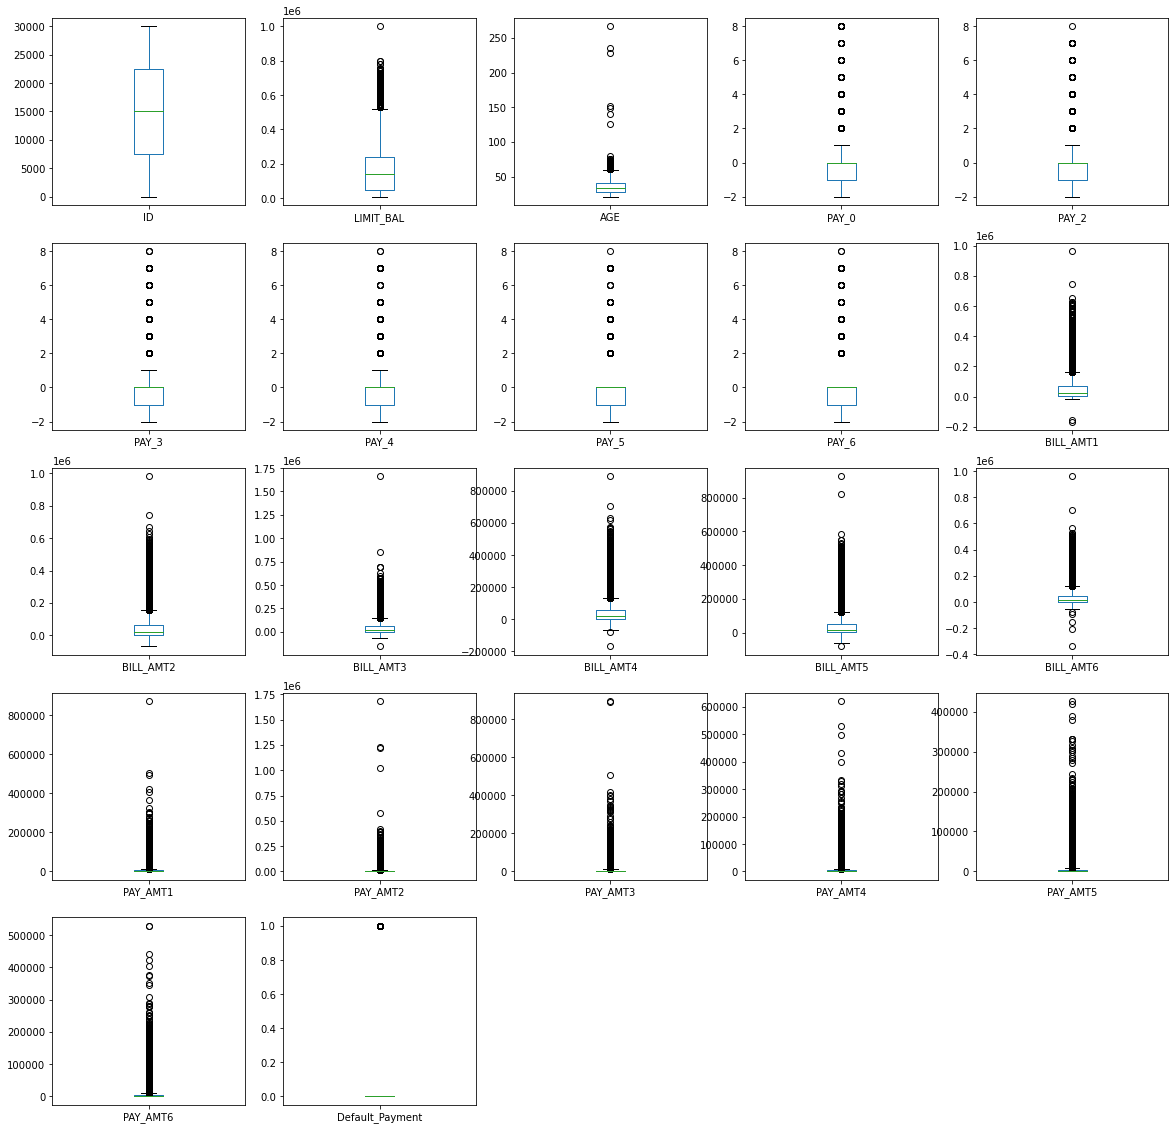

In [28]:
#Catergorical data don't need boxplots
myData2.plot(kind="box",subplots=True,figsize=(20,20),layout=(5,5))
#myData2[i].plot.box()
plt.show()

We Can deduce that:
1. The 'AGE' column contains 7 samples above
2. Of course for categorical data need to be encoded with one Hot Encoding Technique by One Hot Encoding or Label Encoder
3. Some of numeric columns need to be scaled
4. Note that there are not strong correlations between columns so we don't need to drop any columns
5. Target data is not balanced. It need to be balanced by using balancing technique such as SMOTE

In [29]:
# We need to see the Avgerage of the all values of the columns and set that value over 100
avg = int(myData2['AGE'].sum()/ len(myData2['AGE']))
myData2.loc[myData2['AGE'] > 100 , 'AGE'] = avg


In [30]:
(myData2['AGE'] > 100).sum()

0

In [31]:
LabelEncoder = preprocessing.LabelEncoder()
for i in ['SEX', 'EDUCATION' , 'MARRIAGE']:
    myData2[i] = LabelEncoder.fit_transform(myData2[i])
    myData2[i].value_counts()
myData2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
0,1,20000,0,3,0,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,3,1,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,3,1,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,3,0,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,3,0,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,1,0,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,1,1,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,3,1,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,1,0,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
dummy_data = pd.get_dummies(data = myData2 , columns=['SEX','EDUCATION','MARRIAGE'], prefix_sep='_', sparse=False)

In [ ]:
myData2 = dummy_data
myData2

In [32]:
from sklearn.preprocessing import StandardScaler
unscaled_data = myData2.drop(columns=['Default_Payment', 'SEX', 'EDUCATION', 'MARRIAGE'])

In [33]:
from sklearn import preprocessing

In [34]:
normalized = preprocessing.normalize(unscaled_data)
col_names = unscaled_data.columns
scaled_data = pd.DataFrame(normalized , columns= col_names)
scaled_data.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.000048,0.969135,0.001163,0.000097,0.000097,-0.000048,-0.000048,-0.000097,-0.000097,0.189611,...,0.033387,0.000000,0.000000,0.000000,0.000000,0.033387,0.000000,0.000000,0.000000,0.000000
1,0.000017,0.998005,0.000216,-0.000008,0.000017,0.000000,0.000000,0.000000,0.000017,0.022305,...,0.022305,0.027212,0.028734,0.027121,0.000000,0.008317,0.008317,0.008317,0.000000,0.016633
2,0.000030,0.898265,0.000339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291826,...,0.135329,0.143034,0.149192,0.155190,0.015151,0.014971,0.009981,0.009981,0.009981,0.049904
3,0.000037,0.456620,0.000338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.429132,...,0.450145,0.258575,0.264465,0.269835,0.018265,0.018438,0.010959,0.010046,0.009763,0.009132
4,0.000062,0.615783,0.000702,-0.000012,0.000000,-0.000012,0.000000,0.000000,0.000000,0.106124,...,0.441331,0.257890,0.235795,0.235611,0.024631,0.451750,0.123157,0.110841,0.008485,0.008362


In [35]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = unscaled_data.columns
d = scaler.fit_transform(unscaled_data)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.000000,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.000033,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.000067,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.000100,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.000133,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


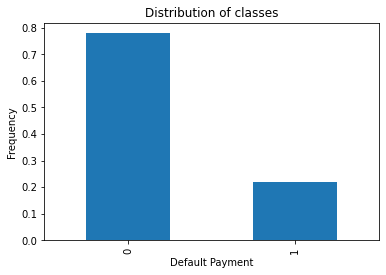

In [36]:
(myData2['Default_Payment'].value_counts() / len(myData2) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.xlabel('Default Payment')
plt.show()

In [37]:
myData2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
0,1,20000,0,3,0,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,3,1,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,3,1,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,3,0,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,3,0,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,1,0,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,1,1,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,3,1,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,1,0,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Splitting the Data

Now we need to convert all categorical columns to numerical values:
By get dummy method we can apply "One Hot Encoding Technique"

In [38]:
X = myData2.drop(['Default_Payment'] , axis = 1)

In [39]:
myData2['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


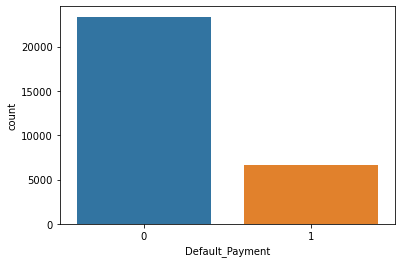

In [40]:
sns.countplot(myData2['Default_Payment'])
plt.show()

In [41]:
y_target = myData2['Default_Payment']
y_target.value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.15,random_state=10 , shuffle=True , stratify=y_target)

In [43]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (25500, 24) and size 612000
X_test shape (4500, 24) and size 108000
y_train shape (25500,) and size 25500
y_test shape (4500,) and size 4500


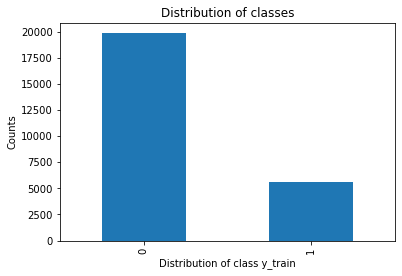

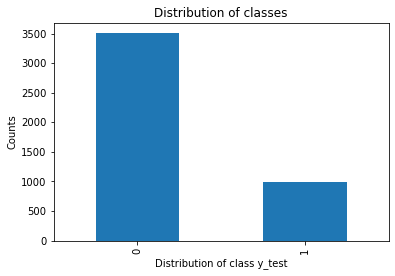

In [44]:
for i in ['y_train' , 'y_test']: # Here, we need to use eval function to get the values of these two classes
    (eval(i).value_counts()).plot(kind='bar')
    plt.title('Distribution of classes')
    plt.xlabel(f'Distribution of class {i}')
    plt.ylabel('Counts')
    plt.show()

In [45]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_test == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test == 0)))

Before OverSampling, counts of label '1': 5641
Before OverSampling, counts of label '0': 19859 

Before OverSampling, counts of label '1': 995
Before OverSampling, counts of label '0': 3505 



In [46]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_X: (39718, 24)
After OverSampling, the shape of train_y: (39718,) 

After OverSampling, counts of label '1': 19859
After OverSampling, counts of label '0': 19859


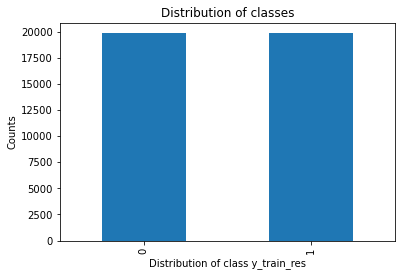

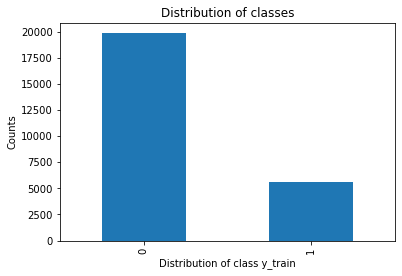

In [47]:
for i in ['y_train_res','y_train']: # Here, we need to use eval function to get the values of these two classes
    (eval(i).value_counts()).plot(kind='bar')
    plt.title('Distribution of classes')
    plt.xlabel(f'Distribution of class {i}')
    plt.ylabel('Counts')
    plt.show()

# Training the Model

#### Without using SMOTE

In [48]:
def Evaluation_Metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    
    print(f"Accuracy:  {acc*100} %") 
    print(f"Precision:  {precision*100} %") 
    print(f"Recall:  {recall*100} %") 
    print(f"F1_score:  {f_score*100} %") 
    sns.heatmap(cm, annot = True, linewidths = 2, cbar = True, linecolor = "white", fmt = ".0f")
    plt.show()

Logistic Regression Algorithm:

In [49]:
model = LogisticRegression()
trained_model = model.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)
y_pred_train = trained_model.predict(X_train)
y_pred

C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
print(confusion_matrix(y_test, y_pred))
print('\n',confusion_matrix(y_train, y_pred_train))
print('Test Accuracy:' , accuracy_score(y_test,y_pred)*100)
print('Train_Accuracy:', accuracy_score(y_train, y_pred_train)*100)


[[3505    0]
 [ 995    0]]

 [[19859     0]
 [ 5641     0]]
Test Accuracy: 77.88888888888889
Train_Accuracy: 77.87843137254902


C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  77.88888888888889 %
Precision:  0.0 %
Recall:  0.0 %
F1_score:  0.0 %


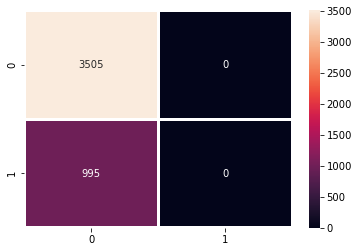

C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  77.87843137254902 %
Precision:  0.0 %
Recall:  0.0 %
F1_score:  0.0 %


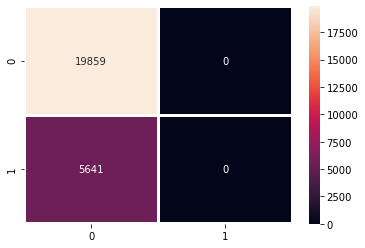

In [53]:
Evaluation_Metrics(y_test , y_pred)
Evaluation_Metrics(y_train , y_pred_train)
#Evaluation_Metrics(y_train_res , y_pred_train_res)

Randonm Forest Algorithm:

In [54]:
Classifier=RandomForestClassifier(n_estimators=15 , max_depth=6)

In [59]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (25500, 24) and size 612000
X_test shape (4500, 24) and size 108000
y_train shape (25500,) and size 25500
y_test shape (4500,) and size 4500


In [60]:
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)
y_pred_train = Classifier.predict(X_train)

In [61]:
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy: ' , accuracy_score(y_test,y_pred)*100)
print('\nTrain_Accuracy: ',  accuracy_score(y_train, y_pred_train)*100)

[[3344  687]
 [ 161  308]]

Test Accuracy:  81.15555555555557

Train_Accuracy:  82.09019607843138


Accuracy:  81.15555555555557 %
Precision:  65.67164179104478 %
Recall:  30.954773869346734 %
F1_score:  42.076502732240435 %


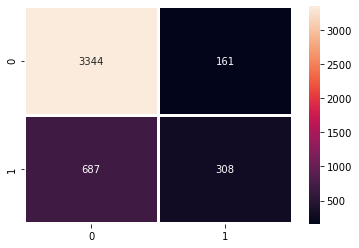

In [62]:
Evaluation_Metrics(y_test , y_pred)

#### With using SMOTE

In [73]:
Classifier=RandomForestClassifier(n_estimators=15 , max_depth=6)

In [74]:
print("X_train shape {} and size {}".format(X_train_res.shape,X_train_res.size))
print("y_train shape {} and size {}".format(y_train_res.shape,y_train_res.size))

X_train shape (39718, 24) and size 953232
y_train shape (39718,) and size 39718


In [75]:
Classifier.fit(X_train_res, y_train_res)
y_pred_train_res = Classifier.predict(X_train_res)

In [76]:
print(confusion_matrix(y_train_res, y_pred_train_res))

[[16966  2893]
 [ 6439 13420]]


Accuracy:  76.50435570773956 %
Precision:  82.2656776803776 %
Recall:  67.57641371670276 %
F1_score:  74.20103947804931 %


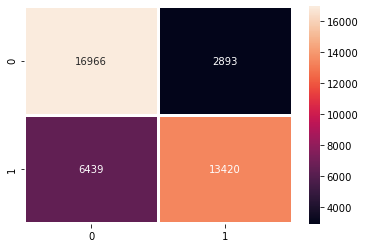

In [77]:
Evaluation_Metrics(y_train_res , y_pred_train_res)

XGBoost Algorithm:

In [78]:
import xgboost
xgboost_classifier = xgboost.XGBClassifier()

In [79]:
xgboost_classifier.fit(X_train_res,y_train_res)
y_pred = xgboost_classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

Accuracy:  77.48888888888888 %
Precision:  49.04255319148936 %
Recall:  46.33165829145728 %
F1_score:  47.64857881136951 %


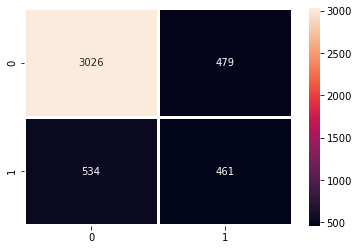

In [80]:
Evaluation_Metrics(y_test , y_pred)

#### Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [94]:
model_grid_search = RandomForestClassifier(random_state=30)
parameters = {'n_estimators': [50, 70, 100, 150], 
              'min_samples_split': [2,4],
              'min_samples_leaf': [1,3]}
grid_searchCV = GridSearchCV(model_grid_search, parameters, cv=5, scoring='accuracy',n_jobs=-1 , 
                             verbose=2, return_train_score=True)

grid_result= grid_searchCV.fit(X_train_res, y_train_res)
grid_result

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 70, 100, 150]},
             return_train_score=True, scoring='accuracy', verbose=2)

[ 6  3  2  1  8  7  5  4 15 13  9 11 15 13  9 11]


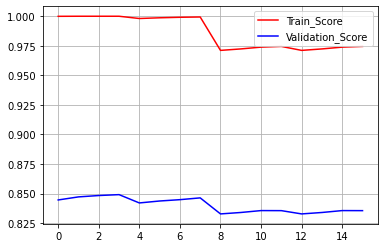

In [95]:
train_score =  grid_searchCV.cv_results_['mean_train_score'] 
test_score = grid_searchCV.cv_results_['mean_test_score'] 
t_range = grid_searchCV.cv_results_['rank_test_score']
print(t_range)
plt.plot(range(len(train_score)), train_score, color='red', label='Train_Score')
plt.plot(range(len(train_score)), test_score, color='blue', label='Validation_Score')
plt.legend()
plt.grid()
plt.show()

Accuracy:  78.82222222222222 %
Precision:  52.32300884955752 %
Recall:  47.537688442211056 %
F1_score:  49.8156924697209 %


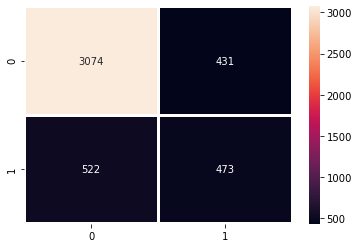

In [96]:
y_pred = grid_searchCV.best_estimator_.predict(X_test)
Evaluation_Metrics(y_test , y_pred)